In [1]:
# Hide log information
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

# import tensorflow
import tensorflow as tf

In [2]:
# load mnist dataset
mnist = tf.keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

# scale or normalize the datasets
training_images=training_images/255.0
test_images=test_images/255.0

training_images.shape, test_images.shape

((60000, 28, 28), (10000, 28, 28))

In [3]:
# create model
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),            # 28 * 28 => (784,1)
  tf.keras.layers.Dense(128, activation=tf.nn.relu),
  tf.keras.layers.Dense(64, activation=tf.nn.relu),
  tf.keras.layers.Dense(32, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [4]:
# compile model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [5]:
# fit model
history = model.fit(training_images, training_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2446 - accuracy: 0.9279
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1076 - accuracy: 0.9677
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0771 - accuracy: 0.9761
Epoch 4/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0585 - accuracy: 0.9813
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0481 - accuracy: 0.9847
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0404 - accuracy: 0.9866
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0326 - accuracy: 0.9890
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0290 - accuracy: 0.9905
Epoch 9/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0266 - accuracy: 0.9912
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.024

In [6]:
# evaluate model
out = model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.1062 - accuracy: 0.9727


In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 10)                330       
                                                                 
Total params: 111,146
Trainable params: 111,146
Non-trainable params: 0
_________________________________________________________________


In [8]:
print("Model Accuracy: {}".format(out[1]))
print("Model Loss:     {}".format(out[0]))

Model Accuracy: 0.9726999998092651
Model Loss:     0.1062251478433609


In [9]:
history.history.keys()

dict_keys(['loss', 'accuracy'])

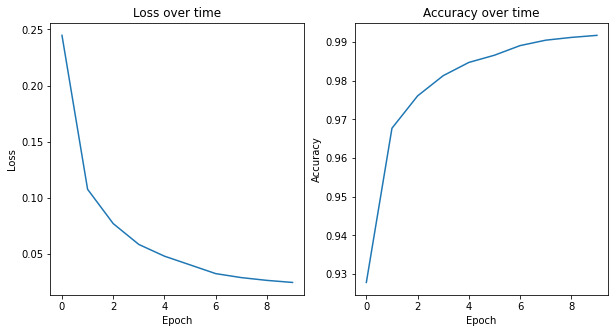

In [10]:
import matplotlib.pyplot as plt

loss_values = history.history['loss']
accuracy_values = history.history['accuracy']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

ax1.plot(loss_values)
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.set_title('Loss over time')

ax2.plot(accuracy_values)
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy')
ax2.set_title('Accuracy over time')

plt.show()


In [11]:
model.weights

[<tf.Variable 'dense/kernel:0' shape=(784, 128) dtype=float32, numpy=
 array([[-0.00710479,  0.0647923 ,  0.06554195, ...,  0.01023574,
          0.06290372,  0.00389034],
        [ 0.04380562,  0.02867319,  0.06819773, ...,  0.05965597,
         -0.02171589, -0.02581802],
        [ 0.06452244, -0.01537387, -0.06841554, ..., -0.03622957,
         -0.07788622, -0.05815158],
        ...,
        [ 0.02224897,  0.00908987,  0.02125449, ...,  0.01127827,
          0.03639286,  0.05850831],
        [ 0.03497484, -0.05461101,  0.00395155, ...,  0.04313514,
          0.01870967,  0.00221404],
        [ 0.06028897, -0.04312638, -0.06440385, ..., -0.01781458,
          0.02552317,  0.02227161]], dtype=float32)>,
 <tf.Variable 'dense/bias:0' shape=(128,) dtype=float32, numpy=
 array([-0.0446714 , -0.02928768, -0.00054314,  0.10382634, -0.12290275,
        -0.05824015, -0.01393295,  0.13150504,  0.06325123,  0.02782784,
         0.23389916, -0.08705961,  0.05358259,  0.08523729, -0.19266656,
    

In [13]:
model.save('mnist.h5')